# MODEL BUILDING

# Image Preprocessing

### Importing the ImageDataGenerator Library 

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Define The Parameters /Arguments For ImageDataGenerator Class

In [12]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,vertical_flip=True)

In [13]:
test_datagen  = ImageDataGenerator(rescale=1./255)

### Applying ImageDataGenerator Functionality To Trainset And Testset 

In [14]:
x_train = train_datagen.flow_from_directory(r"D:\IBM project\DATASET FOREST FIRES\Dataset\Dataset\train_set",
                                            target_size=(256,256),batch_size=32,class_mode="binary")

Found 433 images belonging to 2 classes.


In [15]:
x_test = test_datagen.flow_from_directory(r"D:\IBM project\DATASET FOREST FIRES\Dataset\Dataset\test_set",
                                          target_size=(256,256),batch_size=32,class_mode="binary")

Found 120 images belonging to 2 classes.


In [16]:
x_train.class_indices

{'no fire': 0, 'with fire': 1}

# CNN Model Building

### Importing the Model building libraries

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [18]:
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

### Initialize the model

In [19]:
model = Sequential()

### Adding CNN layers

In [20]:
#add covlution layer
model.add(Convolution2D(32,(3,3),input_shape=(256,256,3),activation='relu'))
# 32 => no of feature detectors
#(3,3)=> kernel size(feature detector size => 3*3 matrix)

#add maxpooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

In [16]:
# you can add more convolutiona and pooling layers
model.add(Convolution2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [17]:
model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [18]:
#flatten layer => input layer to your ANN
model.add(Flatten())

### Adding Dense Layers

In [19]:
#hidden layers

In [20]:
model.add(Dense(units=500,kernel_initializer="random_uniform",activation="relu"))

In [21]:
model.add(Dense(units=500,kernel_initializer="random_uniform",activation="relu"))

In [22]:
#output layer

In [23]:
model.add(Dense(units=1,kernel_initializer="random_uniform",activation="sigmoid"))

### Configuring the learning process

In [24]:
#compile the model
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

### Training the model

In [27]:
h = model.fit(x_train,steps_per_epoch=14,epochs=25,validation_data=x_test,validation_steps=4)
#steps_per_epoch = no of train images/batch size --> 433/32 = 13.5
#validation_steps = no of test images/batch size --> 120/32 = 3.7

Epoch 1/25
14/14 [==============================] - 76s 5s/step - loss: 0.6528 - accuracy: 0.6697 - val_loss: 0.3201 - val_accuracy: 0.9167
Epoch 2/25
14/14 [==============================] - 64s 5s/step - loss: 0.2900 - accuracy: 0.8730 - val_loss: 0.0686 - val_accuracy: 0.9750
Epoch 3/25
14/14 [==============================] - 62s 4s/step - loss: 0.2161 - accuracy: 0.9145 - val_loss: 0.0482 - val_accuracy: 1.0000
Epoch 4/25
14/14 [==============================] - 63s 4s/step - loss: 0.2161 - accuracy: 0.9053 - val_loss: 0.0545 - val_accuracy: 0.9833
Epoch 5/25
14/14 [==============================] - 67s 5s/step - loss: 0.2135 - accuracy: 0.9145 - val_loss: 0.0656 - val_accuracy: 0.9917
Epoch 6/25
14/14 [==============================] - 66s 5s/step - loss: 0.1870 - accuracy: 0.9169 - val_loss: 0.0337 - val_accuracy: 0.9917
Epoch 7/25
14/14 [==============================] - 64s 4s/step - loss: 0.1402 - accuracy: 0.9330 - val_loss: 0.0705 - val_accuracy: 0.9750
Epoch 8/25
14/14 [==

### Save the Model

In [35]:
model.save("forest_trial.h5")

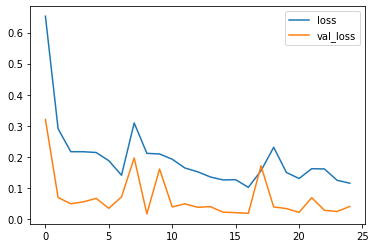

In [34]:
import matplotlib.pyplot as plt
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.legend(['loss', 'val_loss'])

# Predictions - Test The Model 

In [2]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [3]:
model = load_model("forest_trial.h5")

### With fire

In [4]:
img = image.load_img(r"fire_test.jpg",target_size=(256,256))

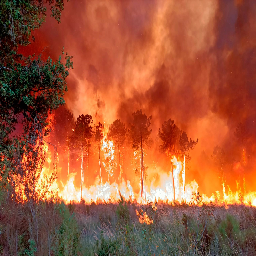

In [5]:
img

In [8]:
x = image.img_to_array(img)

In [9]:
type(x)

numpy.ndarray

In [11]:
x.shape

(256, 256, 3)

In [12]:
w = np.expand_dims(x,axis=0)
w.shape

(1, 256, 256, 3)

In [13]:
pred_prob = model.predict(w)

1/1 [==============================] - 1s 1s/step


In [14]:
pred_prob

array([[1.]], dtype=float32)

In [15]:
if(pred_prob[0]==0):
    print('No fire is Detected')
else:
    print('Fire is Detected !')

Fire is Detected !


### Without fire

In [17]:
img1 = image.load_img(r"nofire_test.jpeg",target_size=(256,256))

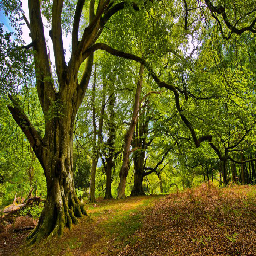

In [18]:
img1

In [19]:
y = image.img_to_array(img1)

In [20]:
w = np.expand_dims(y,axis=0)
w.shape

(1, 256, 256, 3)

In [21]:
pred_prob = model.predict(w)

1/1 [==============================] - 0s 334ms/step


In [22]:
pred_prob

array([[0.]], dtype=float32)

In [23]:
if(pred_prob[0]==0):
    print('No fire is Detected')
else:
    print('Fire is Detected !')

No fire is Detected
